# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/dianaxnav/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


The first dataset contains information about multiple hazardous spills in the state of New York. This data is reported by the spiller and sent to the state to be reported and published on the data site. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

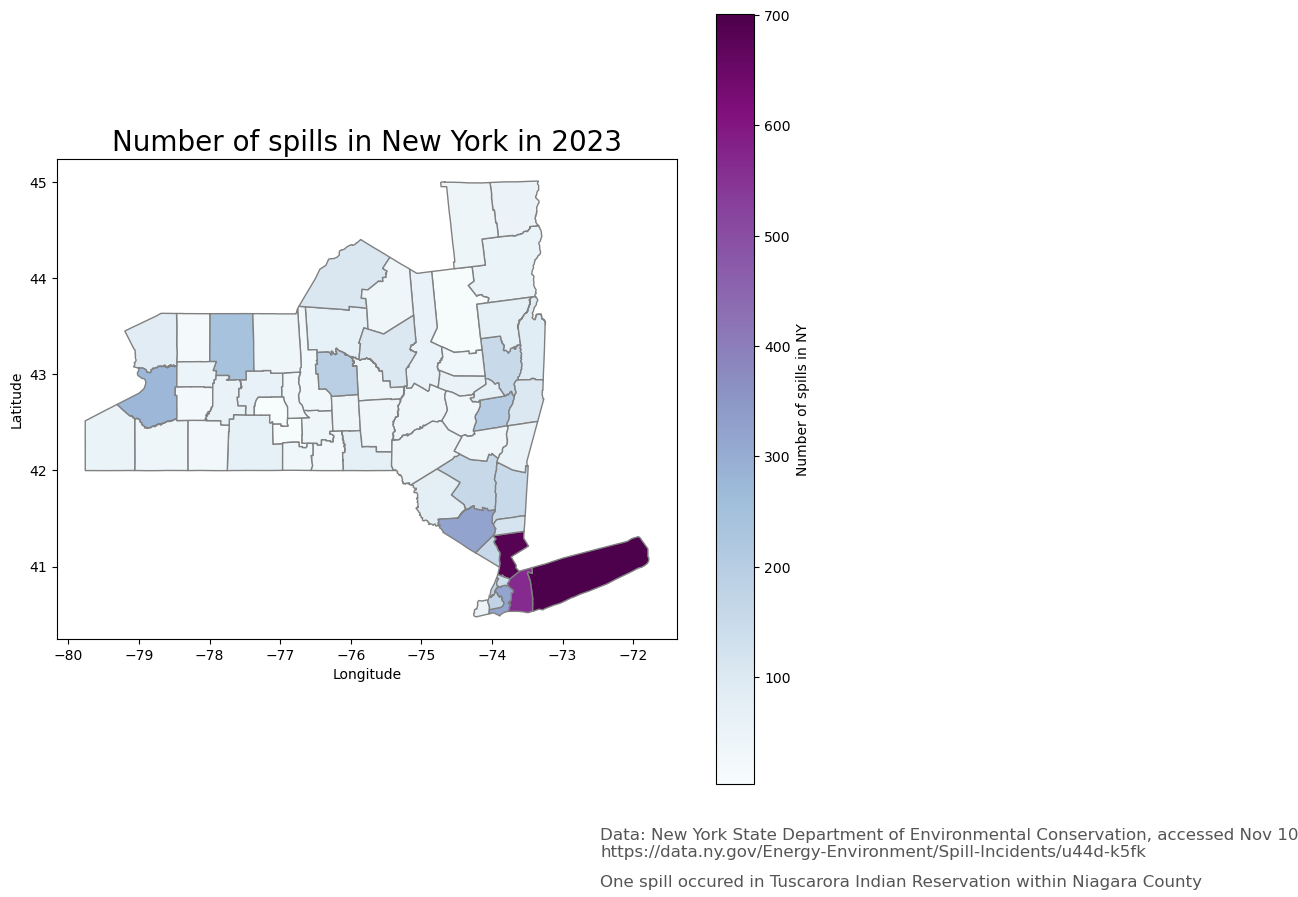

In [55]:
### ===== FINAL CODE =====

# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import numpy too
import numpy as np

# read in the data using csv file
spills = pd.read_csv('data/Spill_Incidents.csv')
#read in the shape data using read_file
counties = gpd.read_file('data/tl_2022_us_county/')

# 2. lets simplify the cols by lower casing 
spills.columns = spills.columns.str.lower()

#lets replace the space with _
spills.columns = spills.columns.str.replace(' ', '_')

#convert my col to date time 
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

#use the & operator to select the data 
petr_23 = spills[(spills['spill_date']>= '01/01/23') & (spills['spill_date']<= '10/31/23') & (spills['material_family'] == 'Petroleum') ]

# extract number of communities by country as a pd.Series
spills_per_county = petr_23.groupby('county').count().spill_number

# convert the pd.Series into a pd.DataFrame and update it
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'spill_number':'n_spills'}).reset_index()

#simplify the cols by lower casing 
counties.columns = counties.columns.str.lower()

#select all county data from new york county 
ny_counties = counties[(counties['statefp'] == '36')]

#rename the column 'name' to 'county' so it has a name in common
ny_counties = ny_counties.rename(columns = {'name':'county'})

#use inner join to merge the data frames
ny_counties = pd.merge(ny_counties,
                            spills_per_county,
                            how='inner',
                            on='county')

#update index in the ny_counties dataset
ny_counties = ny_counties.set_index('county')

#add one to niagara n_spills to account for Tuscarora Indian Reservation 
ny_counties.at['Niagara', 'n_spills'] += 1

#plot the figure
fig, ax = plt.subplots(figsize=(10, 8))#adjust the size
ny_counties.plot(ax=ax, #call ax
                      column='n_spills', #what you want to plot the data by 
                       cmap='BuPu', #adjust color legend
                       legend=True,
                       edgecolor="0.5",
                       legend_kwds={"shrink":1, #edit color legend
                                    'label': "Number of spills in NY"
                                    }
                       )

ax.set_title('Number of spills in New York in 2023',  fontsize=20)#label the graph
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 10, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(.6, .04), # position
            xycoords='figure fraction', 
            fontsize=12, #adjust font size
            color='#555555')
#annotation indicating one spill occured in Tuscarora
ax.annotate("One spill occured in Tuscarora Indian Reservation within Niagara County",
           xy=(0.6, 0.01), #position
            xycoords='figure fraction', 
            fontsize=12, #adjust font size
            color='#555555') #color

plt.show()

#print it out
plt.show()

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import numpy too
import numpy as np


## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# read in the data using csv file
spills = pd.read_csv('data/Spill_Incidents.csv')
#read in the shape data using read_file
counties = gpd.read_file('data/tl_2022_us_county/')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# 1. check the head of the dataframe using head function
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# 2. lets simplify the cols by lower casing 
spills.columns = spills.columns.str.lower()

#lets replace the space with _
spills.columns = spills.columns.str.replace(' ', '_')

#check the output 
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [6]:
# 3. lets check the dtypes of the cols 
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [7]:
# 4. check the unqiue values in the material family col 
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates', nan],
      dtype=object)

In [8]:
# 5. check the unqiue vals in county

spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [9]:
#convert my col to date time 

spills['spill_date'] = pd.to_datetime(spills['spill_date'])

#use the & operator to select the data 
petr_23 = spills[(spills['spill_date']>= '01/01/23') & (spills['spill_date']<= '10/31/23') & (spills['material_family'] == 'Petroleum') ]


petr_23


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524797,2306366,WAREHOUSE,24 SOUTH ST,NaN,HIGHLAND,Ulster,NaN,5632,3,2023-10-26,10/26/2023,Equipment Failure,NaN,Commercial/Industrial,10/26/2023,transformer oil,Petroleum,0.0,NaN,0.0
524856,2208816,WARFIELD RESIDENCE,1208 RT23C,NaN,EAST JEWETT,Greene,NaN,2038,4,2023-02-01,02/01/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,240.0,Gallons,0.0
525064,2302232,WARRENSBURG ELEMENTARY SCHOOL,1 JAMES STREET,NaN,WARRENSBURG,Warren,NaN,5740,5,2023-06-19,06/19/2023,Equipment Failure,NaN,"Institutional, Educational, Gov., Other",NaN,unknown petroleum,Petroleum,0.0,NaN,0.0
525070,2305188,WARRENSBURG SERVICE CENTER,3690 main st,NaN,warrensburg,Warren,NaN,5700,5,2023-09-14,09/15/2023,Equipment Failure,NaN,Commercial/Industrial,NaN,transformer oil,Petroleum,1.0,Gallons,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [10]:
#verify the petr_23 only has petroleum data using unique 

petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [11]:
# your code here
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [12]:
# verify that petr_23 only has data from jan to oct 
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [13]:
#create a new dataframe w number of petroleum spills using count 

# calculate number of communities by country

# extract number of communities by country as a pd.Series
spills_per_county = petr_23.groupby('county').count().spill_number

# convert the pd.Series into a pd.DataFrame and update it
spills_per_county = pd.DataFrame(spills_per_county).rename(columns={'spill_number':'n_spills'}).reset_index()



#spills_per_county = petr_23.groupby('county')['county'].count().reset_index(name='n_spills')

spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,28
2,Bronx,142
3,Broome,74
4,Cattaraugus,38
...,...,...
59,Washington,85
60,Wayne,36
61,Westchester,684
62,Wyoming,24


In [14]:
#check to make sure its the same number of cols 
spills_per_county.n_spills.sum()

6965

## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# 1. check the head of the data frame 
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# 2. simplify the cols by lower casing 
counties.columns = counties.columns.str.lower()

In [17]:
# 3. use dtypes to check the data type of the function 
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [18]:
# 4. check the crs of the data frame 
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

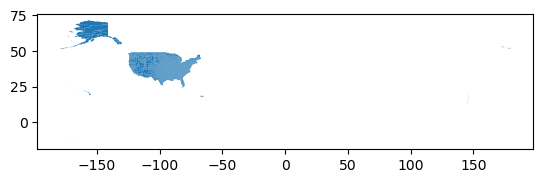

In [19]:
# 5. plot the geodataframe

counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

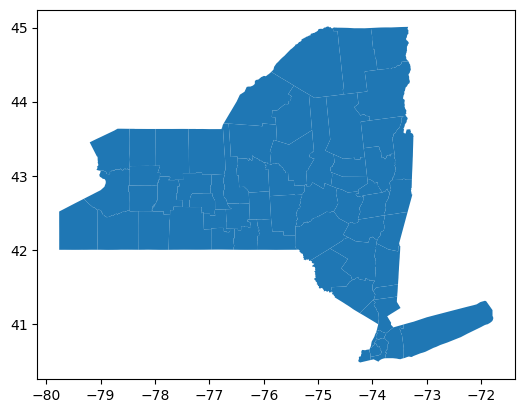

In [20]:
# select all county data from new york county 

ny_counties = counties[(counties['statefp'] == '36')]


ny_counties.head()

#Plot the metadata from counties 

ny_counties.plot() #just in case it doesnt show up, taylor is not processing all the data 

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [21]:
# 1. print the name of counties using unique 

ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [22]:
# 2. print the name of the counties using unqiue again 

spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

**There is a missing county in ny_county dataset.**

In [23]:
# 3. use the setdiff1d() to find county names in spills not ny
np.setdiff1d(spills_per_county, ny_counties, assume_unique = True)

array([204, 28, 142, 74, 38, 26, 53, 31, 37, 51, 60, 35, 40, 155, 278, 53,
       39, 32, 48, 38, 9, 56, 108, 176, 38, 58, 40, 241, 58, 563,
       'New Jersey - Region 2', 6, 170, 87, 106, 192, 64, 324, 15, 67, 33,
       118, 317, 106, 52, 159, 154, 76, 32, 11, 25, 'St Lawrence', 62, 67,
       701, 82, 28, 36, 'Tuscarora Indian Reservation', 1, 157, 76, 85,
       36, 684, 24, 3], dtype=object)

In [24]:
# 4.use the setdiff1d() to find county names in ny not spills
np.setdiff1d(ny_counties, spills_per_county, assume_unique = True)

array(['36', '101', '00974148', ..., '+40.8487111', '-073.8529390',
       <POLYGON ((-73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9...>],
      dtype=object)

In [25]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'.

spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


**There is only 1 spill in Tuscarora Indian Reservation**

### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [26]:
# 1. check the row in spills_per_county that has St Lawrence 

spills_per_county[spills_per_county['county'] == 'St Lawrence']

,county,n_spills
50,St Lawrence,62


In [27]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [28]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [29]:
# 4. use the st.lawrence_index at method to update St Lawrence name 
spills_per_county.at[50, 'county'] = 'St.Lawrence'

In [30]:
# 5. check to make sure it works
spills_per_county[spills_per_county['county'] == 'St.Lawrence']

,county,n_spills
50,St.Lawrence,62


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [31]:
#1.rename the column 'name' to 'county' so it has a name in common
ny_counties = ny_counties.rename(columns = {'name':'county'})

In [32]:
#2.use inner join to merge the data frames
ny_counties = pd.merge(ny_counties, #merge this dataframe first
                            spills_per_county,
                            how='inner',#what kind of inner join
                            on='county')#join by county

# update index
ny_counties = ny_counties.set_index('county')
ny_counties

,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
county,,,,,,,,,,,,,,,,,,
Steuben,36,101,00974148,36101,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",67
Saratoga,36,091,00974143,36091,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",154
Allegany,36,003,00974100,36003,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",28
Oswego,36,075,00974136,36075,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",67
Ulster,36,111,00974153,36111,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Livingston,36,051,00974124,36051,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",58
Delaware,36,025,00974111,36025,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",40
Orange,36,071,00974134,36071,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",324


In [33]:
# 3. add one to niagara n_spills to account for tuscarora 
ny_counties.at['Niagara', 'n_spills'] += 1

#verify to make sure 1 was added (it was 88 prior)
print(ny_counties.at['Niagara', 'n_spills'])

88


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

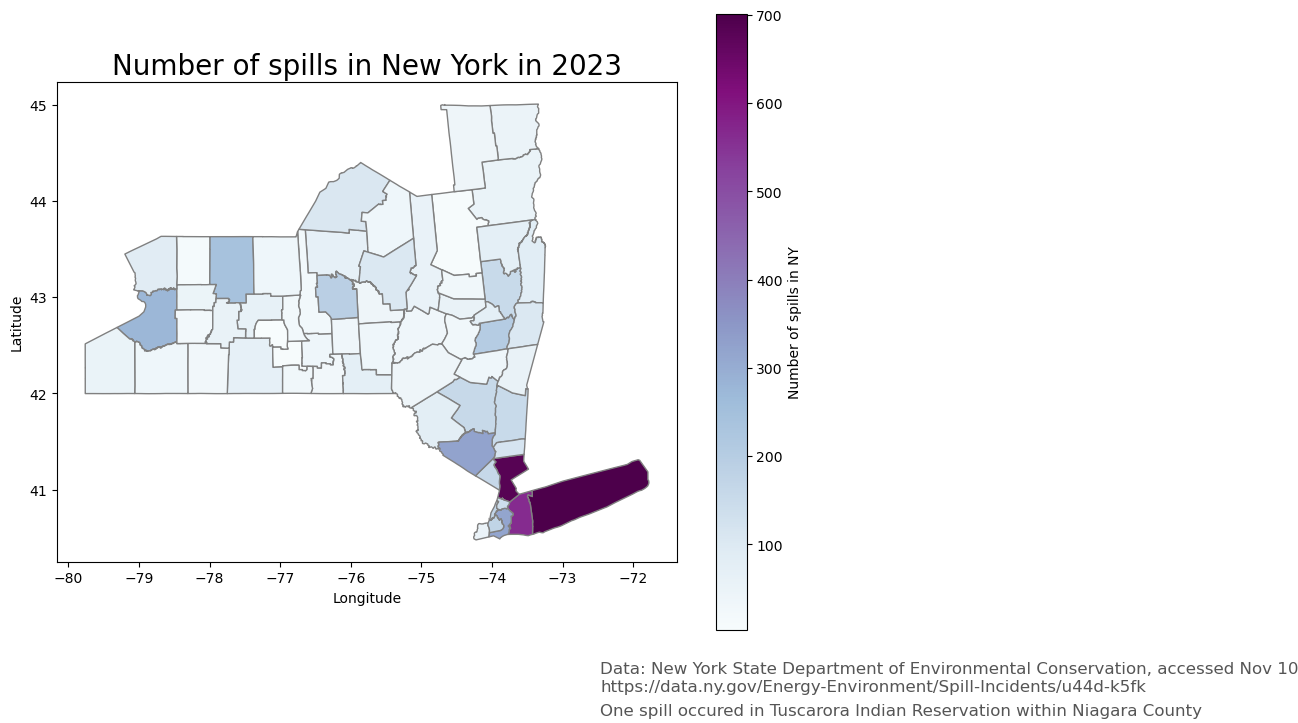

In [57]:
#plot the data
fig, ax = plt.subplots(figsize=(10, 8))#adjust the size of the graph
ny_counties.plot(ax=ax,# call the ax
                      column='n_spills', #plot by n_spills
                       cmap='BuPu', #adjust the color map
                       legend=True,
                       edgecolor="0.5",
                       legend_kwds={"shrink":1,#asjust legend and title
                                    'label': "Number of spills in NY"
                                    }
                       )

ax.set_title('Number of spills in New York in 2023',  fontsize=20) #label your plot
ax.set_xlabel('Longitude') #xlabel
ax.set_ylabel('Latitude')# ylabel
# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 10, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(.6, .04), # position
            xycoords='figure fraction', 
            fontsize=12, #adjust font size
            color='#555555')
#annotation indicating one spill occured in Tuscarora
ax.annotate("One spill occured in Tuscarora Indian Reservation within Niagara County",
           xy=(0.6, 0.01), #position
            xycoords='figure fraction', 
            fontsize=12, #adjust font size
            color='#555555') #color

plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.